## Overview

#### Context
With the 2022 Qatar Fotball World Cup getting underway, I was looking at 2 interesting questions 1) how the pressure of world cup impacts big temas and their ability to qualify for the last 16 and 2) how predictive the Fifa World rankings are at predicting teams performance. Given the relationship between these 2 questions I thought it would be a good chance to do an analysis that showed the correlation between the Fifa Rankings and teams ability to qualify.

For some historical context - at each recent tournament generally at least 1 team considered a major contender for the trophy has gone home after the group stage (Germany in 2018, Italy & England in 2014, France in 2010, Argentina in 2002). The aim of this analysis is to understand the correlation of the world rankings to group stage qualification. 

It should also be noted that the Fifa World Rankings are used to determine the seeding for the tournament, so in theory at least, giving the higher ranked teams an advantage against weaker opposition (i.e. lower ranked teams).

Using several hypothesis and a simple correlation analysis - can we validate if the world ranking is actually a good feature for any future model we would look to build in predicting team performance at the world cup.<br><br>

#### Hypothesis
The hypothesis listed are made on personal experience from previous world cups and will act as guidance in the following analysis (they are not hard facts in any way) 
1) Of the top 16 ranked teams (32 teams overall) at each tournament, at least 75% (i.e. 12 of the 16) will qualify from their groups 
<br>-This 25% should allow primarily for small differences between mid ranked teams.  
2) The winner will come from one of the top 8 ranked teams on every occasion 
<br>-As only 8 teams have ever actually won the mens world cup - this seems a logical assumption. <br><br>

#### Dataset
- The data come from each of the last 7 world cups where 32 teams have competed, from 1998 to 2022.<br>
- The world rankings are taken as the most recent set released prior to the official start of that world cup.<br><br>
Features:
    - Team
    - Country Code
    - FIFA Ranking
    - Country Continent: Continental federation that country was representing.
    - Year: Year of the world cup
    - Tournament Country: Host country
    - Tournament Confederation: Host confederation
    - Result: What stage the team got to at that world cup
    

#### Asumptions
- Countries that competed under different names (e.g. Yugoslavia - Serbia) have been cleaned up as best possible.
- 3rd / 4th place playoff results have been ignored, with both teams assigned semi-final results. <br><br>

#### Additional Information
- Article on Ranking Calculations: https://bleacherreport.com/articles/805784-fifa-world-rankings-why-theyre-wildly-inaccurate
- The calculations for the rankings have changed over time - this article explains the changes: https://en.wikipedia.org/wiki/FIFA_Men%27s_World_Ranking#1993%E2%80%931998_calculation_method

## Environment Setup

In [59]:
import os

## Dataframes
import numpy as np
import pandas as pd

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11,8)})

#### Custom Functions

In [65]:
## Add Labels to barplots - Vertical & Horizontal
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## Read Data

In [171]:
df = pd.read_excel("Team Data.xlsx")

## Exploratory Analysis

#### Data Overview

In [172]:
display(df.head())
display(df.info())

print(f'\n\nMissing Data:')
display(df.isna().sum())

,Team,Country Code,Fifa Ranking,Country Confederation,Year,Tournament Country,Tournament Confederation,Result
0,Brazil,BR,1,CONMEBOL,2022,Qatar,AFC,Quarter Final
1,Belgium,BE,2,UEFA,2022,Qatar,AFC,Group
2,Argentina,AR,3,CONMEBOL,2022,Qatar,AFC,Winner
3,France,FR,4,UEFA,2022,Qatar,AFC,Final
4,England,GB-ENG,5,UEFA,2022,Qatar,AFC,Quarter Final


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Team                      224 non-null    object
 1   Country Code              224 non-null    object
 2   Fifa Ranking              224 non-null    int64 
 3   Country Confederation     224 non-null    object
 4   Year                      224 non-null    int64 
 5   Tournament Country        224 non-null    object
 6   Tournament Confederation  224 non-null    object
 7   Result                    224 non-null    object
dtypes: int64(2), object(6)
memory usage: 14.1+ KB


None



Missing Data:


Team                        0
Country Code                0
Fifa Ranking                0
Country Confederation       0
Year                        0
Tournament Country          0
Tournament Confederation    0
Result                      0
dtype: int64

#### Ranking Summary

In [34]:
df['Fifa Ranking'].describe()

count    224.000000
mean      23.200893
std       17.634043
min        1.000000
25%        9.000000
50%       20.000000
75%       33.250000
max      105.000000
Name: Fifa Ranking, dtype: float64

#### Ranking by Year

Average Ranking by Year:


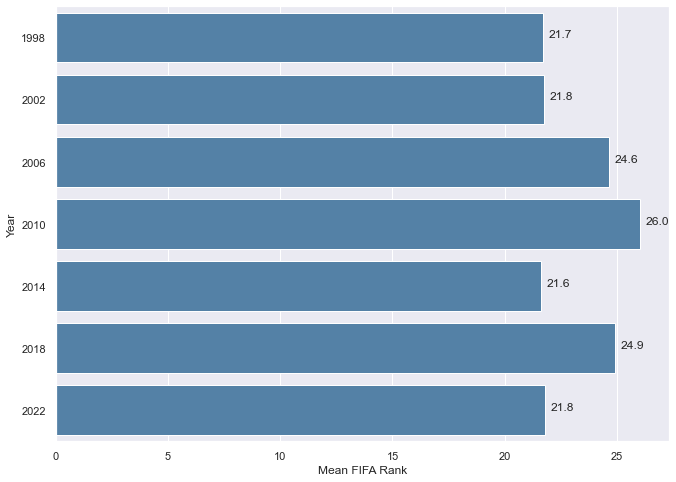


Maximum Ranking by Year:


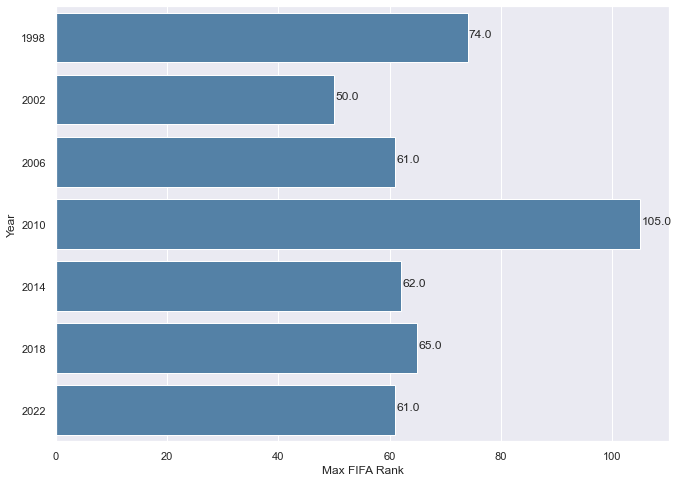


Ranking Boxplot by Year:


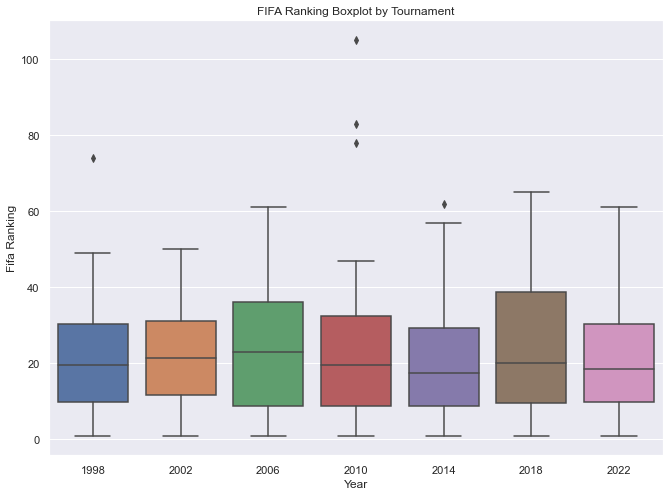


# of teams qualified that are outside the top 32:


,Year,# of Teams Outside Top 32,%
0,1998,7,0.22
1,2002,7,0.22
2,2006,11,0.34
3,2010,8,0.25
4,2014,8,0.25
5,2018,10,0.31
6,2022,7,0.22



# of the top 8 ranked teams that qualified:


,Year,# of Top 8 Ranked Teams,%
0,1998,7,0.88
1,2002,7,0.88
2,2006,8,1.00
3,2010,8,1.00
4,2014,8,1.00
5,2018,8,1.00
6,2022,7,0.88


In [71]:
## Average Rank by Year
print('Average Ranking by Year:')
temp = df[["Year","Fifa Ranking"]].groupby("Year").mean()
temp = temp.reset_index()
temp.columns = ['Year','Mean FIFA Rank']
ax = sns.barplot(data=temp, x="Mean FIFA Rank", y="Year", orient='h', color = 'steelblue')
show_values(ax, "h", space=0.25)
plt.show();


## Max Rank by Year
print('\nMaximum Ranking by Year:')
temp = df[["Year","Fifa Ranking"]].groupby("Year").max()
temp = temp.reset_index()
temp.columns = ['Year','Max FIFA Rank']
ax = sns.barplot(data=temp, x="Max FIFA Rank", y="Year", orient='h', color = 'steelblue')
show_values(ax, "h", space=0.25)
plt.show();

## Outlier Analysis
print('\nRanking Boxplot by Year:')
sns.boxplot(x='Year', y= 'Fifa Ranking', data=df).set(title='FIFA Ranking Boxplot by Tournament');
plt.show()

## Number of teams outside top 32 in the world rankings
print('\n# of teams qualified that are outside the top 32:')
temp = df.copy()
temp['outside_top_32'] = temp['Fifa Ranking'] > 32
temp = temp[["Year","outside_top_32"]].groupby("Year").sum() 
temp = temp.reset_index()
temp.columns = ['Year','# of Teams Outside Top 32']
temp['%'] = (temp['# of Teams Outside Top 32'] / 32).round(2)
display(temp)

## Check if all the top 8 ranked teams qualified for the tournament
print('\n# of the top 8 ranked teams that qualified:')
temp = df.copy()
temp['top_8'] = temp['Fifa Ranking'] <= 8
temp = temp[["Year","top_8"]].groupby("Year").sum() 
temp = temp.reset_index()
temp.columns = ['Year','# of Top 8 Ranked Teams']
temp['%'] = (temp['# of Top 8 Ranked Teams'] / 8).round(2)
display(temp)

#### Continent / Confederation by Year

Number of Countries per Continent per Year:


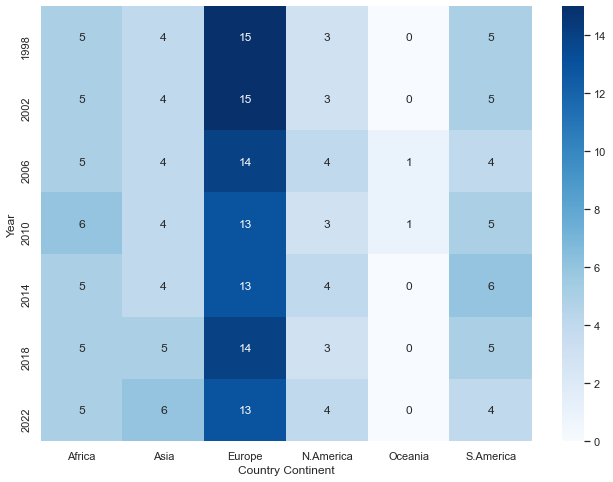

In [173]:
## Create Continent Name
continent_name = {'AFC':'Asia','CAF':'Africa','CONACAF':'N.America','CONMEBOL':'S.America','OFC':'Oceania','UEFA':'Europe'}
df['Country Continent'] = df['Country Confederation'].map(continent_name)

print('Number of Countries per Continent per Year:')
temp = pd.pivot_table(df, values='Country Code', index='Year', columns='Country Continent', aggfunc='count')
temp.fillna(0, inplace = True)
temp = temp.astype(int)

sns.heatmap(temp, annot=True, cmap="Blues")
plt.show();


#### Ranking by Continent / Confederation

Overall Average Ranking by Continent:


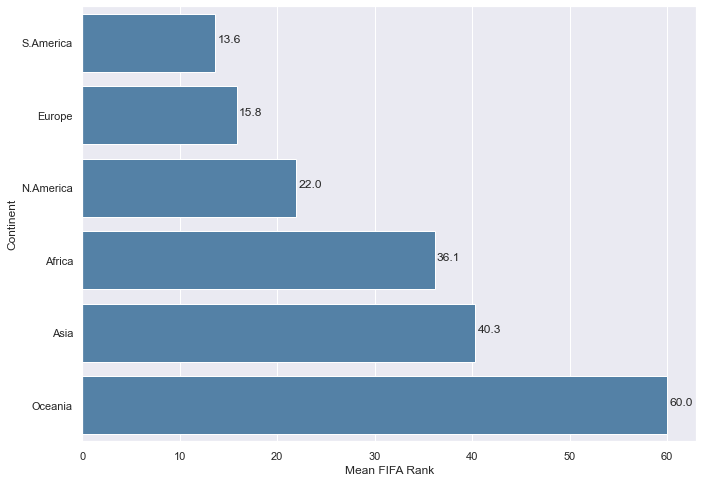

Overall Max Ranking by Continent:


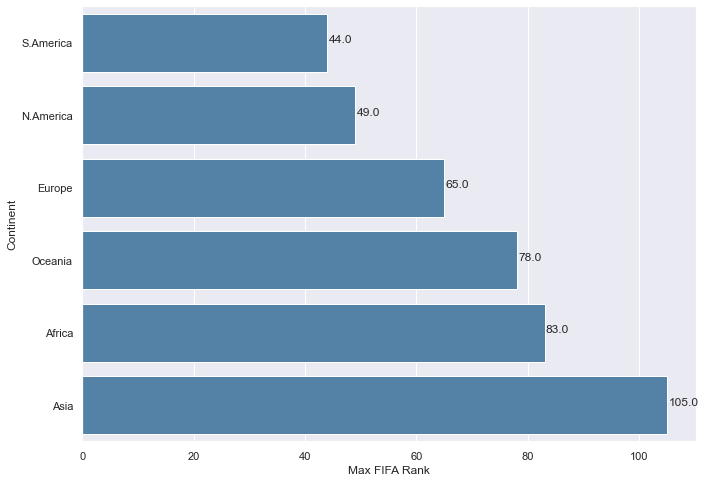


Ranking Boxplot by Continent:


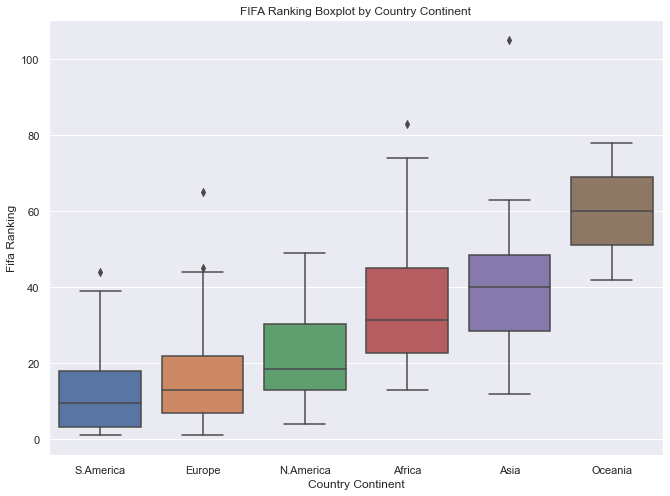

Average Ranking per Continent per Year:


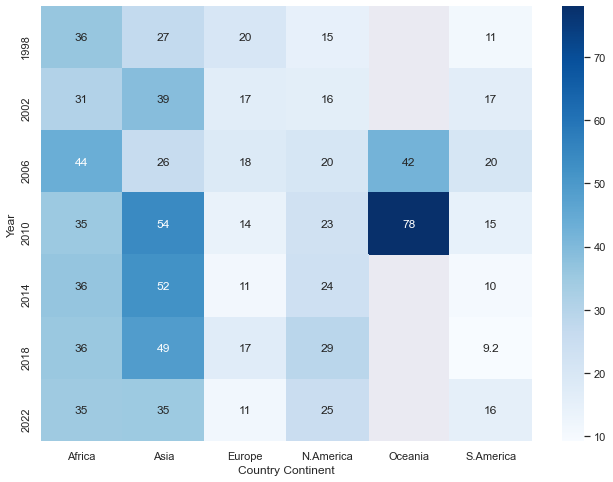

In [123]:
## Average Rank by Continent
print('Overall Average Ranking by Continent:')
temp = df[['Country Continent' ,'Country Confederation','Fifa Ranking']].groupby(['Country Continent' ,'Country Confederation']).mean()
temp = temp.reset_index()
temp.columns = ['Continent','Confederation','Mean FIFA Rank']
temp.sort_values('Mean FIFA Rank',inplace = True)
ax = sns.barplot(data=temp, x="Mean FIFA Rank", y="Continent", orient='h', color = 'steelblue')
show_values(ax, "h", space=0.25)
plt.show();

## Max Rank by Continent
print('Overall Max Ranking by Continent:')
temp = df[['Country Continent' ,'Fifa Ranking']].groupby(['Country Continent']).max()
temp = temp.reset_index()
temp.columns = ['Continent','Max FIFA Rank']
temp.sort_values('Max FIFA Rank',inplace = True)
ax = sns.barplot(data=temp, x="Max FIFA Rank", y="Continent", orient='h', color = 'steelblue')
show_values(ax, "h", space=0.25)
plt.show();


## Outlier Analysis - Continent Rankings
print('\nRanking Boxplot by Continent:')
sns.boxplot(x='Country Continent', y= 'Fifa Ranking', data=df).set(title='FIFA Ranking Boxplot by Country Continent');
plt.show()

## Average Ranking per Continent per Year
print('Average Ranking per Continent per Year:')
temp = pd.pivot_table(df, values='Fifa Ranking', index='Year', columns='Country Continent', aggfunc='mean')
sns.heatmap(temp, annot=True, cmap="Blues")
plt.show();

#### Ranking by Country

Number of Unique Countries: 68


Number of Appearances by Country (top 10):


Brazil         7
Argentina      7
France         7
England        7
Spain          7
South Korea    7
Japan          7
Mexico         7
Germany        7
Croatia        6
Name: Team, dtype: int64



Average Ranking by Country:


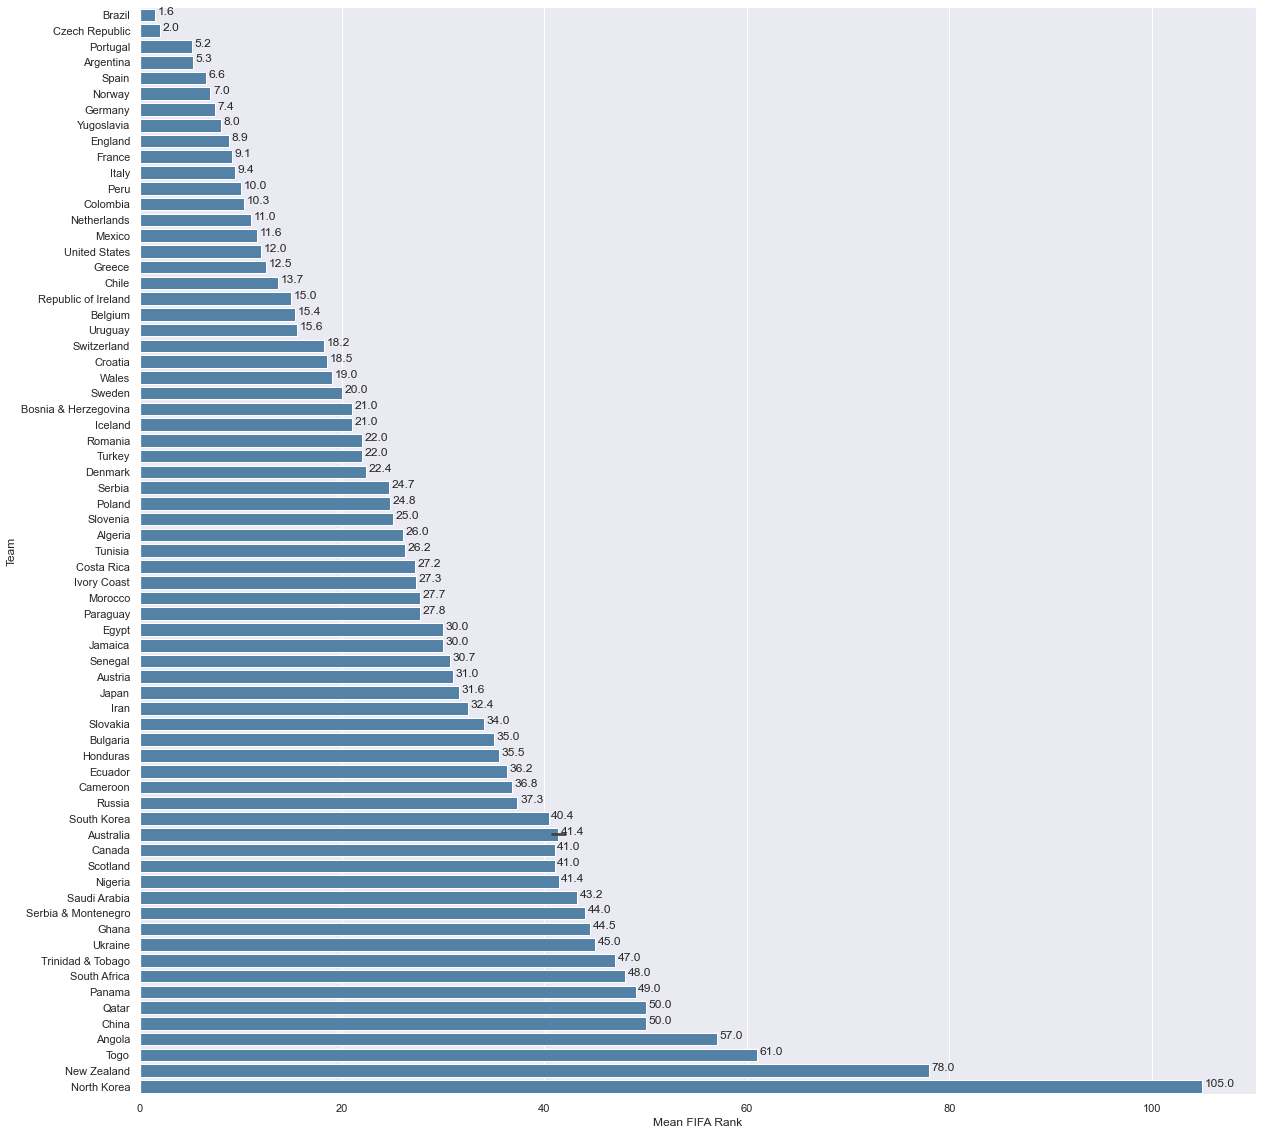

In [155]:
## Total number of teams
print(f"Number of Unique Countries: {df['Country Code'].nunique()}")

## World Cup Appearances by Team
print('\n\nNumber of Appearances by Country (top 10):')
display(df['Team'].value_counts().head(10))

## Average Rank by Team
print('\n\nAverage Ranking by Country:')
temp = df[["Country Continent","Team","Fifa Ranking"]].groupby(["Country Continent","Team"]).mean()
temp = temp.reset_index()
temp.columns = ['Country Continent','Team','Mean FIFA Rank']
temp.sort_values('Mean FIFA Rank',inplace = True)
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.barplot(data=temp, x="Mean FIFA Rank", y="Team", orient='h', color = 'steelblue')
show_values(ax, "h", space=0.25)
plt.show();


#### Dependent Variable Analysis

Group            16.0
Last 16           8.0
Quarter Final     4.0
Semi Final        2.0
Winner            1.0
Final             1.0
Name: Result, dtype: float64



Last 7 winners:


,Team,Country Code,Fifa Ranking,Country Confederation,Year,Tournament Country,Tournament Confederation,Result,Country Continent,Ordered Result
2,Argentina,AR,3,CONMEBOL,2022,Qatar,AFC,Winner,S.America,6. Winner
39,France,FR,7,UEFA,2018,Russia,UEFA,Winner,Europe,6. Winner
88,Germany,DE,2,UEFA,2014,Brazil,CONMEBOL,Winner,Europe,6. Winner
126,Spain,ES,2,UEFA,2010,South Africa,CAF,Winner,Europe,6. Winner
151,Italy,IT,13,UEFA,2006,Germany,UEFA,Winner,Europe,6. Winner
173,Brazil,BR,2,CONMEBOL,2002,Japan & South Korea,AFC,Winner,S.America,6. Winner
215,France,FR,18,UEFA,1998,France,UEFA,Winner,Europe,6. Winner




Continent by Stage Knocked Out:


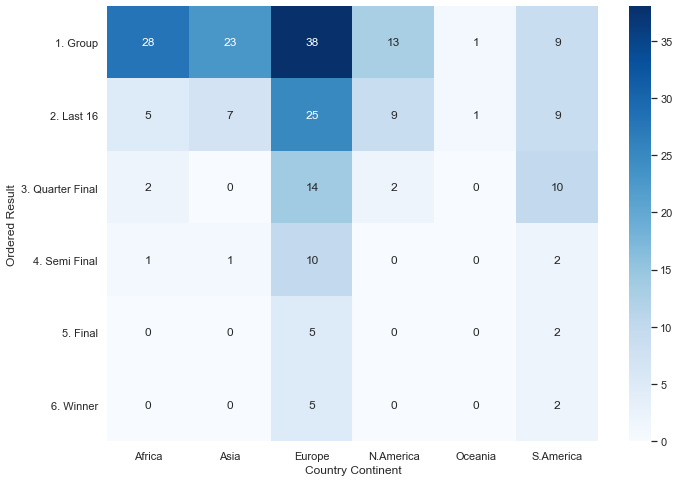

In [174]:
result_ordered = {'Group': '1. Group', 'Last 16':'2. Last 16', 'Quarter Final': '3. Quarter Final', 
                  'Semi Final':'4. Semi Final','Final': '5. Final','Winner': '6. Winner'}

df['Ordered Result'] = df['Result'].map(result_ordered)


## Ensure totals make sense (7 world cups) 
display(df['Result'].value_counts() / 7)


## Check Winners
print('\n\nLast 7 winners:')
display(df[df['Result'] == 'Winner'])

## Continent by Stage Knocked out
print('\n\nContinent by Stage Knocked Out:')
temp = pd.pivot_table(df, values='Country Code', index='Ordered Result', columns='Country Continent', aggfunc='count')
temp.fillna(0, inplace = True)
temp = temp.astype(int)

sns.heatmap(temp, annot=True, cmap="Blues")
plt.show();

## Data Cleanup
#### Dependent Variable

In [175]:
## Create qualified feature to indicate group stage qualification 
df['qualified_group'] = 0
df.loc[df['Result'] != 'Group', 'qualified_group'] = 1

#### Independent Variables

In [176]:
## Sort
df.sort_values(by = ['Year','Fifa Ranking'], inplace = True)

## Create Cleaned up rank from 0-31
df['Fifa Ranking - Clean'] = df.groupby('Year').cumcount()

## Create prediction on group qualification based on FIFA Ranking (i.e. Top 16 teams qualify)
df['prediction_group_qual'] = 0
df.loc[df['Fifa Ranking - Clean'] <= 15, 'prediction_group_qual'] = 1

## Hypothsis Testing

#### Qualification from Group Stage
Hypothesis: Of the top 16 ranked teams at each tournament, at least 75% will qualify from their groups 

% Top Ranked Teams Qualifying From Group (All Tournaments): 0.7054
Top Teams Qualified per Year:


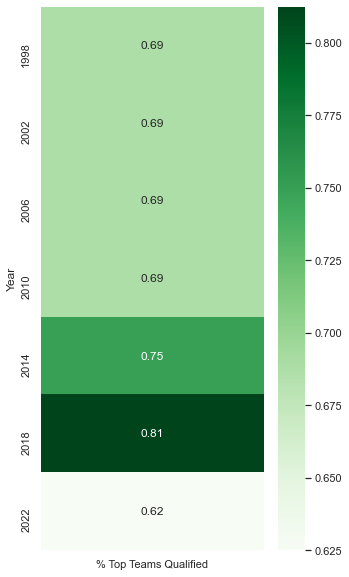

In [192]:
## Overal Hypothesis 
overall_group_hyp = sum(df['prediction_group_qual'] == df['qualified_group']) / len(df)
print(f'% Top Ranked Teams Qualifying From Group (All Tournaments): {round(overall_group_hyp, 4)}')


print('Top Teams Qualified per Year:')
temp = df.copy()
temp['top_team_qual'] = temp['prediction_group_qual'] == temp['qualified_group']
temp = temp[['Year','top_team_qual']].groupby(['Year']).mean()
temp = temp.reset_index()
temp.columns = ['Year','% Top Teams Qualified']
temp = temp.set_index('Year')

fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(temp, annot=True, cmap="Greens")
plt.show();


##### Notes
While the 2 most recent world cups (prior to 2022) have seen 81% & 75% respectivly, in general the % of top ranked teams that qualify is actually 71%.<br><br>
A couple of thoughts on this:<br>
    - One obvious reason for my initial hypotheisis of 75% may have been caused by a recency bias from the 2 most recent world cups. This is something we always need to be concious about when developing hypothesis and recomendations.<br>
    - The dataset we are looking at is relativly small with only 7 tournaments. Additional analysis (perhaps around the regional tournaments) would allow for a more robust findings.

#### Winner From Top 8
Hypothesis: The winner will come from one of the top 8 ranked teams on every occasion 

In [204]:
temp = df[df['Result'] == 'Winner']
display(temp[['Team','Fifa Ranking','Fifa Ranking - Clean','Year']])
top_8_winners = sum(temp['Fifa Ranking - Clean'] < 8) / len(temp)
print(f'\n% of winners are in top 8 seeds: {top_8_winners}')

,Team,Fifa Ranking,Fifa Ranking - Clean,Year
215,France,18,14,1998
173,Brazil,2,1,2002
151,Italy,13,10,2006
126,Spain,2,1,2010
88,Germany,2,1,2014
39,France,7,6,2018
2,Argentina,3,2,2022



% of winners are in top 8 seeds: 0.7142857142857143


##### Notes
Again the rankings do not perform as well as expected. We see that both France in 1998 and Italy in 2006 sat outside the top 8 teams - causing us to have a result oif 71% also.

## Conclusion

Overall the Fifa World Rankings are not hugely predictive, however they do have some value .<br> 
For Hypothesis 1 (% top raking teams that qualify), 71% means that on average 11.36 of the top 16 teams qualify from the group stage (compared to a predicted 12 from 16).<br>
On Hypothesiss 2, we really do lack enough data as 7 data points (i.e. 7 world cups) is a tiny sample and really not enough data to make a statistically significant summary. However we can disprove the idea that the team that wins the tournament is always in the top 8 ranked teams at the tournament.  
